In [16]:
# import required libraries
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Anonymize_Loan_Default_data.csv',encoding='latin1', index_col=0)
data.info()

data.head()

# Drop columns that will not be used (dates, zip codes)
columns_to_drop = ['id','member_id', 'issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line', 'next_pymnt_d', 'zip_code']
data = data.drop(columns_to_drop, axis=1)

# Drop rows with missing values
data.dropna(inplace=True)

# Get dataset size including target variable
print('Dataset shape:',data.shape)

# Convert percentage strings to numerical values
data['revol_util'] = data['revol_util'].str.strip('%').astype(float)

# Convert term to numerical values
data['term'] = data['term'].str.extract('(\d+)').astype(int)

# Convert emp_length to numerical values
data['emp_length'] = data['emp_length'].str.extract('(\d+)').astype(float)



<class 'pandas.core.frame.DataFrame'>
Index: 38480 entries, 2 to 38480
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38480 non-null  int64  
 1   member_id               38480 non-null  int64  
 2   loan_amnt               38479 non-null  float64
 3   funded_amnt             38479 non-null  float64
 4   funded_amnt_inv         38479 non-null  float64
 5   term                    38480 non-null  object 
 6   int_rate                38480 non-null  float64
 7   installment             38479 non-null  float64
 8   emp_length              37487 non-null  object 
 9   home_ownership          38480 non-null  object 
 10  annual_inc              38478 non-null  float64
 11  verification_status     38480 non-null  object 
 12  issue_d                 38480 non-null  object 
 13  loan_status             38480 non-null  object 
 14  purpose                 38480 non-null  obj

In [23]:

# To Check the Columns, not important
print('Columns in the DataFrame:', data.columns)

# Handle remaining numerical variables
# Example: Fill missing values in 'annual_inc' with the mean
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)

# Display the dataset after handling remaining variables
print('Dataset after handling remaining variables:')
print(data.head())

Columns in the DataFrame: Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'loan_status', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'repay_fail',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')
Dataset after handling remaining variables:
    loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installm

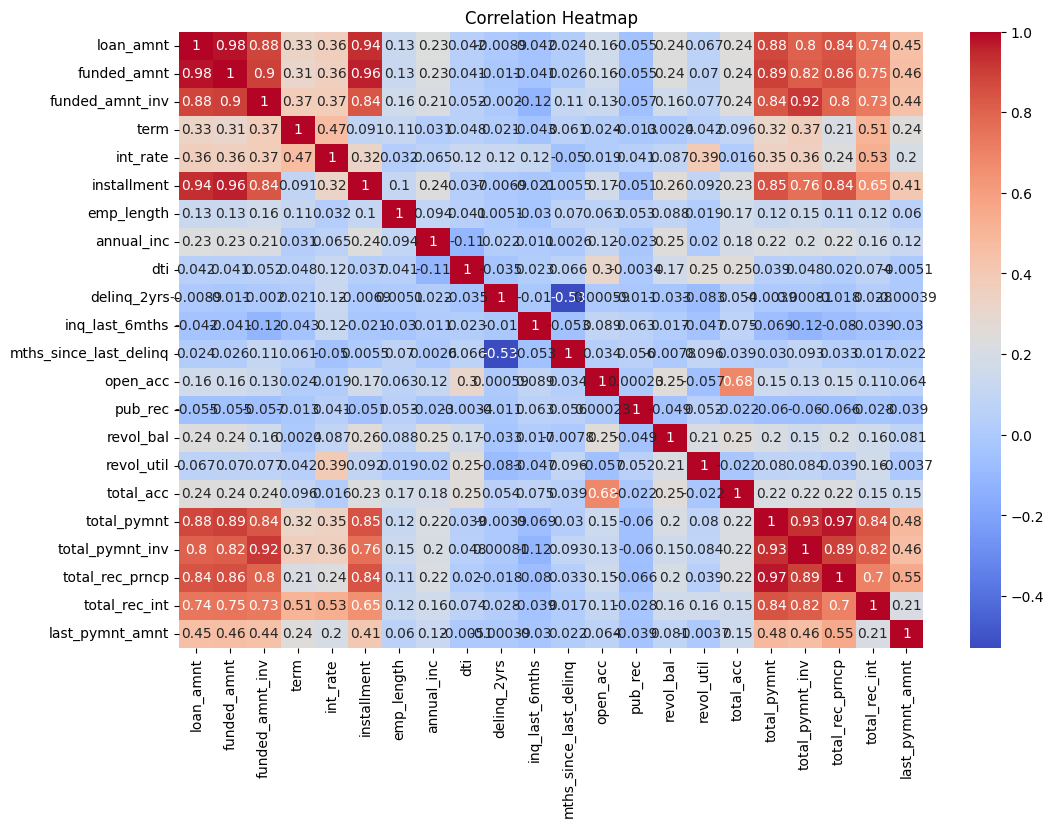

In [46]:
# Split the data into features (X) and target (y)
# Split the data into features (X) and target (y)
X = data.drop(columns_to_drop, axis=1, errors='ignore').drop('repay_fail', axis=1, errors='ignore')
y = data['repay_fail']

# Explore correlations
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_columns]

# Explore correlations
plt.figure(figsize=(12, 8))
sns.heatmap(X_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [48]:
X_encoded = pd.get_dummies(X)

# Split the data into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9993
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2281
           1       1.00      1.00      1.00       475

    accuracy                           1.00      2756
   macro avg       1.00      1.00      1.00      2756
weighted avg       1.00      1.00      1.00      2756

